In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error, explained_variance_score, r2_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Load train dataset
df_train=pd.read_excel('./Participants_Data_Final/Data_Train.xlsx')
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
# Load test dataset
df_test=pd.read_excel('./Participants_Data_Final/Data_Test.xlsx')
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [4]:
df_train.shape, df_test.shape

((12690, 9), (4231, 8))

In [5]:
df_train.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [6]:
df_test.isna().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null object
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null object
TIME             12690 non-null object
CITY             12578 non-null object
LOCALITY         12592 non-null object
RATING           12688 non-null object
VOTES            11486 non-null object
COST             12690 non-null int64
dtypes: int64(2), object(7)
memory usage: 892.3+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
TITLE            4231 non-null object
RESTAURANT_ID    4231 non-null int64
CUISINES         4231 non-null object
TIME             4231 non-null object
CITY             4196 non-null object
LOCALITY         4201 non-null object
RATING           4229 non-null object
VOTES            3829 non-null object
dtypes: int64(1), object(7)
memory usage: 264.5+ KB


#### EDA

In [10]:
# Identify the duplicate records
df_train.duplicated().sum()

25

In [11]:
# Reomove duplicates
df_train = df_train.drop_duplicates()

In [12]:
# Identify the duplicate records
df_test.duplicated().sum()

1

In [13]:
# Reomove duplicates
df_test = df_test.drop_duplicates()

In [14]:
df_train.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

In [15]:
df_test.isna().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [16]:
# We can remove Restaurant ID from the dataset as it is not a price dependent attribute
df_train = df_train.drop('RESTAURANT_ID', axis=1)
df_test = df_test.drop('RESTAURANT_ID', axis=1)

In [17]:
df_train['TIME'].unique()

array(['11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)', '6pm – 11pm (Mon-Sun)',
       '11am – 3:30pm, 7pm – 11pm (Mon-Sun)', ...,
       '12:1pm – 4am (Mon-Sun)', '12:30pm – 9:45pm (Mon-Sun)',
       '12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...'], dtype=object)

In [18]:
# The TIME has less importance, so we can drop that also
df_train = df_train.drop('TIME', axis=1)
df_test = df_test.drop('TIME', axis=1)

In [19]:
df_train.VOTES.unique()  

array(['49 votes', '30 votes', '221 votes', ..., '2723 votes',
       '1426 votes', '1214 votes'], dtype=object)

In [20]:
df_test.VOTES.unique() 

array(['564 votes', '61 votes', '350 votes', ..., '1697 votes',
       '749 votes', '1239 votes'], dtype=object)

In [21]:
# Converting string to int, due to null values need to convert to type float
df_train.VOTES=df_train.VOTES.str.replace('votes','').astype(float) 
df_test.VOTES=df_test.VOTES.str.replace('votes','').astype(float)

In [22]:
# Replace the missing values with mean values.
df_train.VOTES=df_train.VOTES.fillna(df_train.VOTES.mean())
df_test.VOTES=df_test.VOTES.fillna(df_test.VOTES.mean())
print(df_train.isna().sum())
print(df_test.isna().sum())

TITLE         0
CUISINES      0
CITY        112
LOCALITY     98
RATING        2
VOTES         0
COST          0
dtype: int64
TITLE        0
CUISINES     0
CITY        35
LOCALITY    30
RATING       2
VOTES        0
dtype: int64


In [23]:
# As the city and Locality are important attributes for price variation, better we can remove these null data
df_train.dropna(axis=0, inplace=True)
df_test.dropna(axis=0, inplace=True)

In [24]:
df_train.shape, df_test.shape

((12550, 7), (4193, 6))

In [25]:
print(df_train.isna().sum())
print(df_test.isna().sum())

TITLE       0
CUISINES    0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
dtype: int64
TITLE       0
CUISINES    0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
dtype: int64


In [26]:
# Lets check RATING column and convert to integer
print(df_train['RATING'].unique())
print(df_test['RATING'].unique())

['3.6' '4.2' '3.8' '4.1' '4.0' '4.3' '3.9' '3.3' '3.4' '-' '4.5' '3.5'
 '4.4' '2.7' '3.7' '4.7' 'NEW' '3.1' '2.5' '4.6' '2.8' '3.0' '3.2' '2.6'
 '2.9' '4.9' '4.8' '2.4' '2.3' '2.0' '2.1' '2.2']
['4.3' '4.2' '3.8' '3.6' '3.7' 'NEW' '4.0' '3.4' '3.2' '4.1' '3.0' '-'
 '3.5' '4.5' '3.9' '3.3' '2.9' '3.1' '2.5' '2.8' '4.6' '4.4' '2.7' '4.8'
 '2.6' '4.9' '2.1' '4.7' '2.3' '2.4' '2.2']


In [27]:
# For converting RATING to float, we need to handle NEW and nan strings
def get_rating(df_rating):
    rating_mode = df_rating.mode()
    rating_list = list(df_rating)

    for i in range(len(rating_list)):
        try:
            rating_list[i] = float(rating_list[i])
        except:
            rating_list[i] = float(rating_mode)
            
    return rating_list

In [28]:
df_train['RATING'] = get_rating(df_train['RATING'])
df_test['RATING'] = get_rating(df_test['RATING'])

In [29]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12550 entries, 0 to 12689
Data columns (total 7 columns):
TITLE       12550 non-null object
CUISINES    12550 non-null object
CITY        12550 non-null object
LOCALITY    12550 non-null object
RATING      12550 non-null float64
VOTES       12550 non-null float64
COST        12550 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 784.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4193 entries, 0 to 4230
Data columns (total 6 columns):
TITLE       4193 non-null object
CUISINES    4193 non-null object
CITY        4193 non-null object
LOCALITY    4193 non-null object
RATING      4193 non-null float64
VOTES       4193 non-null float64
dtypes: float64(2), object(4)
memory usage: 229.3+ KB


(None, None)

In [30]:
# Lets check other object 

In [31]:
# Create a function to check the count of titles after split
def split_data_count(df_data):
    titles = list(df_data)
    title_count = 1
    for i in titles:
        if len(i.split(',')) > title_count:
            title_count = len(i.split(','))
    return title_count

In [32]:
# Create a function to get unique titles after split
def split_data_title(df_data):
    titles_list = list(df_data)
    titles_array = []
    for i in titles_list :
        if len(i.split(',')) == 1:
            titles_array.append(i.split(',')[0].strip())
        else:
            for x in range(len(i.split(','))):
                titles_array.append(i.split(',')[x].strip())
            
    print("No# Unique Titles : ", len(pd.Series(titles_array).unique()))
    return list(pd.Series(titles_array).unique())

In [33]:
# Lets find number of Title
title_count_train = split_data_count(df_train['TITLE'])
print("title_count_train : ", title_count_train) 
title_count_test = split_data_count(df_test['TITLE'])
print("title_count_test : ", title_count_test) 

title_count_train :  2
title_count_test :  2


In [34]:
# Lets split TITLE column for Train data
df_title = df_train["TITLE"].str.split(",", n = 2, expand = True)
# We can see a 'None' data from the above unique titles, so we can fill all other na values as None
df_title = df_title.fillna('None')
df_train = pd.concat([df_title, df_train], axis=1)
df_train = df_train.drop(['TITLE'], axis=1)
df_train.head()

,0,1,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,None,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49.0,1200
1,CASUAL DINING,BAR,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,None,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,None,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,None,Desserts,Mumbai,Lower Parel,3.8,165.0,300


In [35]:
df_train.rename(columns={0: 'TITLE_1', 1: 'TITLE_2'}, inplace=True)
df_train.head()

,TITLE_1,TITLE_2,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,None,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49.0,1200
1,CASUAL DINING,BAR,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,None,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,None,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,None,Desserts,Mumbai,Lower Parel,3.8,165.0,300


In [36]:
# Lets split TITLE column for Train data
df_title = df_test["TITLE"].str.split(",", n = 2, expand = True)
# We can see a 'None' data from the above unique titles, so we can fill all other na values as None
df_title = df_title.fillna('None')
df_test = pd.concat([df_title, df_test], axis=1)
df_test = df_test.drop(['TITLE'], axis=1)
df_test.rename(columns={0: 'TITLE_1', 1: 'TITLE_2'}, inplace=True)
df_test.head()

,TITLE_1,TITLE_2,CUISINES,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,None,"North Indian, Chinese, Mughlai, Kebab",Noida,Sector 18,4.3,564.0
1,QUICK BITES,None,"South Indian, Fast Food, Pizza, North Indian",Mumbai,Grant Road,4.2,61.0
2,CASUAL DINING,None,"North Indian, Seafood, Biryani, Chinese",Mumbai,Marine Lines,3.8,350.0
3,None,None,Biryani,Faridabad,NIT,3.8,1445.0
4,QUICK BITES,None,"South Indian, Kerala",Kochi,Kaloor,3.6,23.0


In [37]:
# Lets find unique titles for train dataset and store it for encoding
title_1_train = split_data_title(df_train['TITLE_1'])
title_2_train = split_data_title(df_train['TITLE_2']) 

No# Unique Titles :  23
No# Unique Titles :  20


In [38]:
# Lets find unique titles for test dataset and store it for encoding
title_1_test = split_data_title(df_test['TITLE_1'])
title_2_test = split_data_title(df_test['TITLE_2']) 

No# Unique Titles :  24
No# Unique Titles :  17


In [39]:
# Lets find number of Cuisines
cuisines_count_train = split_data_count(df_train['CUISINES'])
print("cuisines_count_train : ", cuisines_count_train) 
cuisines_count_test = split_data_count(df_test['CUISINES'])
print("cuisines_count_test : ", cuisines_count_test) 

cuisines_count_train :  8
cuisines_count_test :  8


In [40]:
# Lets find unique Cuisines
# Lets split TITLE column for Train data
df_cuisines = df_train["CUISINES"].str.split(",", n = 8, expand = True)
df_cuisines = df_cuisines.fillna('NA')
df_train = pd.concat([df_cuisines, df_train], axis=1)
df_train = df_train.drop(['CUISINES'], axis=1)
df_train.rename(columns={0: 'CUISINE_1', 1: 'CUISINE_2', 2: 'CUISINE_3', 3: 'CUISINE_4', 4: 'CUISINE_5', 5: 'CUISINE_6', 6: 'CUISINE_7', 7: 'CUISINE_8'}, inplace=True)
df_train.head()

,CUISINE_1,CUISINE_2,CUISINE_3,CUISINE_4,CUISINE_5,CUISINE_6,CUISINE_7,CUISINE_8,TITLE_1,TITLE_2,CITY,LOCALITY,RATING,VOTES,COST
0,Malwani,Goan,North Indian,NA,NA,NA,NA,NA,CASUAL DINING,None,Thane,Dombivali East,3.6,49.0,1200
1,Asian,Modern Indian,Japanese,NA,NA,NA,NA,NA,CASUAL DINING,BAR,Chennai,Ramapuram,4.2,30.0,1500
2,North Indian,Chinese,Biryani,Hyderabadi,NA,NA,NA,NA,CASUAL DINING,None,Chennai,Saligramam,3.8,221.0,800
3,Tibetan,Chinese,NA,NA,NA,NA,NA,NA,QUICK BITES,None,Mumbai,Bandra West,4.1,24.0,800
4,Desserts,NA,NA,NA,NA,NA,NA,NA,DESSERT PARLOR,None,Mumbai,Lower Parel,3.8,165.0,300


In [41]:
# Lets find unique Cuisines
# Lets split TITLE column for Test data
df_cuisines = df_test["CUISINES"].str.split(",", n = 8, expand = True)
df_cuisines = df_cuisines.fillna('NA')
df_test = pd.concat([df_cuisines, df_test], axis=1)
df_test = df_test.drop(['CUISINES'], axis=1)
df_test.rename(columns={0: 'CUISINE_1', 1: 'CUISINE_2', 2: 'CUISINE_3', 3: 'CUISINE_4', 4: 'CUISINE_5', 5: 'CUISINE_6', 6: 'CUISINE_7', 7: 'CUISINE_8'}, inplace=True)
df_test.head()

,CUISINE_1,CUISINE_2,CUISINE_3,CUISINE_4,CUISINE_5,CUISINE_6,CUISINE_7,CUISINE_8,TITLE_1,TITLE_2,CITY,LOCALITY,RATING,VOTES
0,North Indian,Chinese,Mughlai,Kebab,NA,NA,NA,NA,CASUAL DINING,None,Noida,Sector 18,4.3,564.0
1,South Indian,Fast Food,Pizza,North Indian,NA,NA,NA,NA,QUICK BITES,None,Mumbai,Grant Road,4.2,61.0
2,North Indian,Seafood,Biryani,Chinese,NA,NA,NA,NA,CASUAL DINING,None,Mumbai,Marine Lines,3.8,350.0
3,Biryani,NA,NA,NA,NA,NA,NA,NA,None,None,Faridabad,NIT,3.8,1445.0
4,South Indian,Kerala,NA,NA,NA,NA,NA,NA,QUICK BITES,None,Kochi,Kaloor,3.6,23.0


In [42]:
# Removing leading and trailing spaces from train and test dataset
df_train["CUISINE_1"] = df_train["CUISINE_1"].str.strip()
df_train["CUISINE_2"] = df_train["CUISINE_2"].str.strip()
df_train["CUISINE_3"] = df_train["CUISINE_3"].str.strip()
df_train["CUISINE_4"] = df_train["CUISINE_4"].str.strip()
df_train["CUISINE_5"] = df_train["CUISINE_5"].str.strip()
df_train["CUISINE_6"] = df_train["CUISINE_6"].str.strip()
df_train["CUISINE_7"] = df_train["CUISINE_7"].str.strip()
df_train["CUISINE_8"] = df_train["CUISINE_8"].str.strip()

df_test["CUISINE_1"] = df_test["CUISINE_1"].str.strip()
df_test["CUISINE_2"] = df_test["CUISINE_2"].str.strip()
df_test["CUISINE_3"] = df_test["CUISINE_3"].str.strip()
df_test["CUISINE_4"] = df_test["CUISINE_4"].str.strip()
df_test["CUISINE_5"] = df_test["CUISINE_5"].str.strip()
df_test["CUISINE_6"] = df_test["CUISINE_6"].str.strip()
df_test["CUISINE_7"] = df_test["CUISINE_7"].str.strip()
df_test["CUISINE_8"] = df_test["CUISINE_8"].str.strip()

In [43]:
# Lets find unique cuisines and store it for encoding
cuisine_1_train = split_data_title(df_train['CUISINE_1'])
cuisine_2_train = split_data_title(df_train['CUISINE_2'])
cuisine_3_train = split_data_title(df_train['CUISINE_3'])
cuisine_4_train = split_data_title(df_train['CUISINE_4'])
cuisine_5_train = split_data_title(df_train['CUISINE_5'])
cuisine_6_train = split_data_title(df_train['CUISINE_6'])
cuisine_7_train = split_data_title(df_train['CUISINE_7'])
cuisine_8_train = split_data_title(df_train['CUISINE_8'])

cuisine_1_test = split_data_title(df_test['CUISINE_1'])
cuisine_2_test = split_data_title(df_test['CUISINE_2'])
cuisine_3_test = split_data_title(df_test['CUISINE_3'])
cuisine_4_test = split_data_title(df_test['CUISINE_4'])
cuisine_5_test = split_data_title(df_test['CUISINE_5'])
cuisine_6_test = split_data_title(df_test['CUISINE_6'])
cuisine_7_test = split_data_title(df_test['CUISINE_7'])
cuisine_8_test = split_data_title(df_test['CUISINE_8'])

No# Unique Titles :  104
No# Unique Titles :  99
No# Unique Titles :  94
No# Unique Titles :  86
No# Unique Titles :  79
No# Unique Titles :  70
No# Unique Titles :  47
No# Unique Titles :  19
No# Unique Titles :  82
No# Unique Titles :  82
No# Unique Titles :  81
No# Unique Titles :  69
No# Unique Titles :  58
No# Unique Titles :  43
No# Unique Titles :  34
No# Unique Titles :  7


In [44]:
# Lets find number of cities
city_count_train = split_data_count(df_train['CITY'])
print(city_count_train)
city_count_test = split_data_count(df_test['CITY'])
print(city_count_test)

1
1


In [45]:
# Lets find unique cities
city_train = split_data_title(df_train['CITY'])
city_test = split_data_title(df_test['CITY'])

No# Unique Titles :  358
No# Unique Titles :  151


In [46]:
# Lets find number of LOCALITY
locality_count_train = split_data_count(df_train['LOCALITY'])
print(locality_count_train)
locality_count_test = split_data_count(df_test['LOCALITY'])
print(locality_count_test)

1
1


In [47]:
# Lets find unique cities
locality_train = split_data_title(df_train['LOCALITY'])
locality_test = split_data_title(df_test['LOCALITY'])

No# Unique Titles :  1413
No# Unique Titles :  832


In [48]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12550 entries, 0 to 12689
Data columns (total 15 columns):
CUISINE_1    12550 non-null object
CUISINE_2    12550 non-null object
CUISINE_3    12550 non-null object
CUISINE_4    12550 non-null object
CUISINE_5    12550 non-null object
CUISINE_6    12550 non-null object
CUISINE_7    12550 non-null object
CUISINE_8    12550 non-null object
TITLE_1      12550 non-null object
TITLE_2      12550 non-null object
CITY         12550 non-null object
LOCALITY     12550 non-null object
RATING       12550 non-null float64
VOTES        12550 non-null float64
COST         12550 non-null int64
dtypes: float64(2), int64(1), object(12)
memory usage: 1.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4193 entries, 0 to 4230
Data columns (total 14 columns):
CUISINE_1    4193 non-null object
CUISINE_2    4193 non-null object
CUISINE_3    4193 non-null object
CUISINE_4    4193 non-null object
CUISINE_5    4193 non-null object
CUISINE_6    4193 no

In [49]:
df_train.isnull().sum()

CUISINE_1    0
CUISINE_2    0
CUISINE_3    0
CUISINE_4    0
CUISINE_5    0
CUISINE_6    0
CUISINE_7    0
CUISINE_8    0
TITLE_1      0
TITLE_2      0
CITY         0
LOCALITY     0
RATING       0
VOTES        0
COST         0
dtype: int64

In [50]:
# Encoding Categorical Variables for train data
from sklearn.preprocessing import LabelEncoder

le_titles_1   = LabelEncoder()
le_titles_2   = LabelEncoder()

le_cuisines_1 = LabelEncoder()
le_cuisines_2 = LabelEncoder()
le_cuisines_3 = LabelEncoder()  
le_cuisines_4 = LabelEncoder()
le_cuisines_5 = LabelEncoder()
le_cuisines_6 = LabelEncoder()
le_cuisines_7 = LabelEncoder()
le_cuisines_8 = LabelEncoder()

le_city       = LabelEncoder()
le_locality   = LabelEncoder()

le_titles_1.fit(title_1_train)
le_titles_2.fit(title_2_train)

le_cuisines_1.fit(cuisine_1_train)
le_cuisines_2.fit(cuisine_2_train)
le_cuisines_3.fit(cuisine_3_train)
le_cuisines_4.fit(cuisine_4_train)
le_cuisines_5.fit(cuisine_5_train)
le_cuisines_6.fit(cuisine_6_train)
le_cuisines_7.fit(cuisine_7_train)
le_cuisines_8.fit(cuisine_8_train)

le_city.fit(city_train)
le_locality.fit(locality_train)

df_train['TITLE_1'] = le_titles_1.transform(df_train['TITLE_1'])
df_train['TITLE_2'] = le_titles_2.transform(df_train['TITLE_2'])

df_train['CUISINE_1'] = le_cuisines_1.transform(df_train['CUISINE_1'])
df_train['CUISINE_2'] = le_cuisines_2.transform(df_train['CUISINE_2'])
df_train['CUISINE_3'] = le_cuisines_3.transform(df_train['CUISINE_3'])
df_train['CUISINE_4'] = le_cuisines_4.transform(df_train['CUISINE_4'])
df_train['CUISINE_5'] = le_cuisines_5.transform(df_train['CUISINE_5'])
df_train['CUISINE_6'] = le_cuisines_6.transform(df_train['CUISINE_6'])
df_train['CUISINE_7'] = le_cuisines_7.transform(df_train['CUISINE_7'])
df_train['CUISINE_8'] = le_cuisines_8.transform(df_train['CUISINE_8'])

df_train['CITY'] = le_city.transform(df_train['CITY'])
df_train['LOCALITY'] = le_locality.transform(df_train['LOCALITY'])

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12550 entries, 0 to 12689
Data columns (total 15 columns):
CUISINE_1    12550 non-null int32
CUISINE_2    12550 non-null int32
CUISINE_3    12550 non-null int32
CUISINE_4    12550 non-null int32
CUISINE_5    12550 non-null int32
CUISINE_6    12550 non-null int32
CUISINE_7    12550 non-null int32
CUISINE_8    12550 non-null int32
TITLE_1      12550 non-null int32
TITLE_2      12550 non-null int32
CITY         12550 non-null int32
LOCALITY     12550 non-null int32
RATING       12550 non-null float64
VOTES        12550 non-null float64
COST         12550 non-null int64
dtypes: float64(2), int32(12), int64(1)
memory usage: 980.5 KB


In [52]:
# Encoding Categorical Variables for test data
from sklearn.preprocessing import LabelEncoder

le_titles_1   = LabelEncoder()
le_titles_2   = LabelEncoder()

le_cuisines_1 = LabelEncoder()
le_cuisines_2 = LabelEncoder()
le_cuisines_3 = LabelEncoder()  
le_cuisines_4 = LabelEncoder()
le_cuisines_5 = LabelEncoder()
le_cuisines_6 = LabelEncoder()
le_cuisines_7 = LabelEncoder()
le_cuisines_8 = LabelEncoder()

le_city       = LabelEncoder()
le_locality   = LabelEncoder()

le_titles_1.fit(title_1_test)
le_titles_2.fit(title_2_test)

le_cuisines_1.fit(cuisine_1_test)
le_cuisines_2.fit(cuisine_2_test)
le_cuisines_3.fit(cuisine_3_test)
le_cuisines_4.fit(cuisine_4_test)
le_cuisines_5.fit(cuisine_5_test)
le_cuisines_6.fit(cuisine_6_test)
le_cuisines_7.fit(cuisine_7_test)
le_cuisines_8.fit(cuisine_8_test)

le_city.fit(city_test)
le_locality.fit(locality_test)

df_test['TITLE_1'] = le_titles_1.transform(df_test['TITLE_1'])
df_test['TITLE_2'] = le_titles_2.transform(df_test['TITLE_2'])

df_test['CUISINE_1'] = le_cuisines_1.transform(df_test['CUISINE_1'])
df_test['CUISINE_2'] = le_cuisines_2.transform(df_test['CUISINE_2'])
df_test['CUISINE_3'] = le_cuisines_3.transform(df_test['CUISINE_3'])
df_test['CUISINE_4'] = le_cuisines_4.transform(df_test['CUISINE_4'])
df_test['CUISINE_5'] = le_cuisines_5.transform(df_test['CUISINE_5'])
df_test['CUISINE_6'] = le_cuisines_6.transform(df_test['CUISINE_6'])
df_test['CUISINE_7'] = le_cuisines_7.transform(df_test['CUISINE_7'])
df_test['CUISINE_8'] = le_cuisines_8.transform(df_test['CUISINE_8'])

df_test['CITY'] = le_city.transform(df_test['CITY'])
df_test['LOCALITY'] = le_locality.transform(df_test['LOCALITY'])


In [53]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4193 entries, 0 to 4230
Data columns (total 14 columns):
CUISINE_1    4193 non-null int32
CUISINE_2    4193 non-null int32
CUISINE_3    4193 non-null int32
CUISINE_4    4193 non-null int32
CUISINE_5    4193 non-null int32
CUISINE_6    4193 non-null int32
CUISINE_7    4193 non-null int32
CUISINE_8    4193 non-null int32
TITLE_1      4193 non-null int32
TITLE_2      4193 non-null int32
CITY         4193 non-null int32
LOCALITY     4193 non-null int32
RATING       4193 non-null float64
VOTES        4193 non-null float64
dtypes: float64(2), int32(12)
memory usage: 294.8 KB


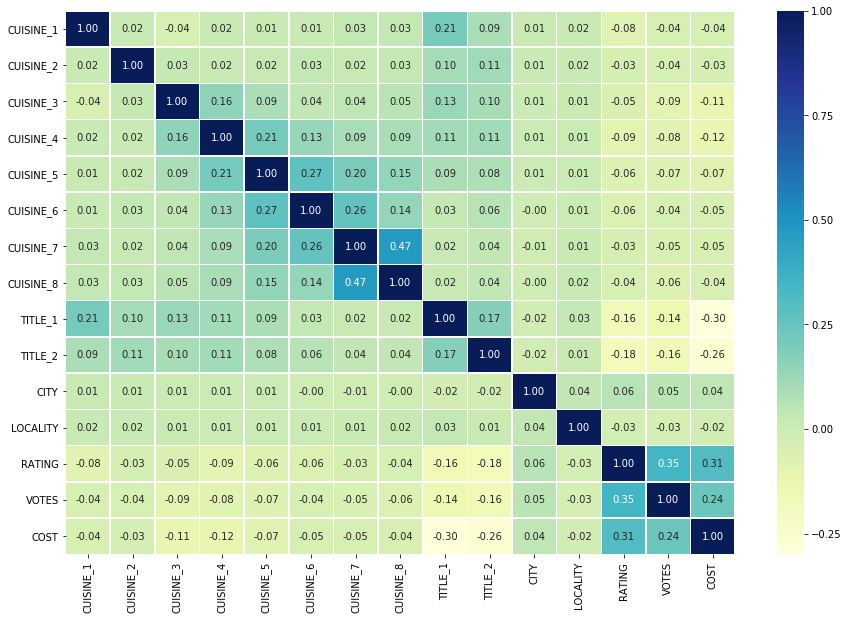

In [55]:
# Let's plot the train set correlation matrix
corr_matrix = df_train.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

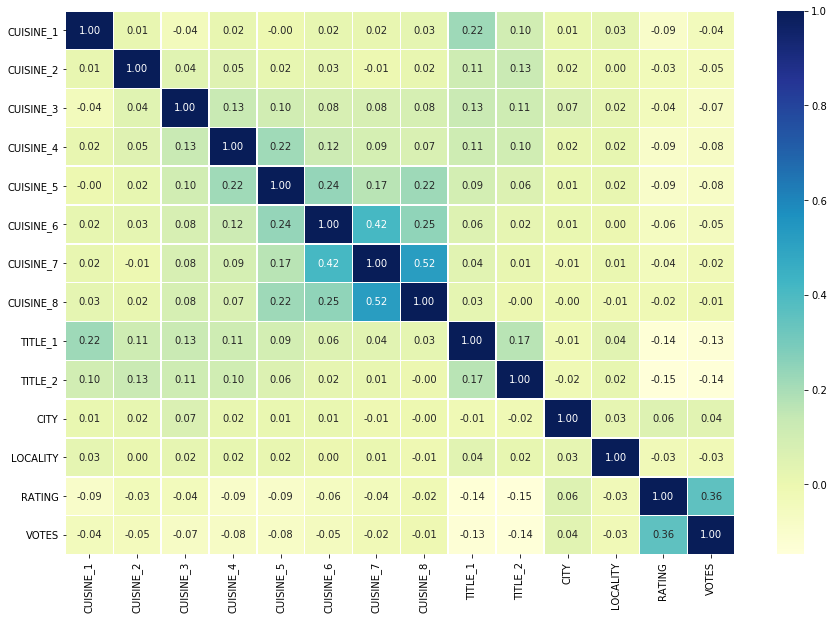

In [56]:
# Let's plot the test set correlation matrix
corr_matrix = df_test.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [58]:
# Lets start modelling
# Split data into X and y
X = df_train.drop("COST", axis=1)
y = df_train["COST"]


In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.340805,-0.647691,0.664473,0.318026,0.193058,0.100218,0.083232,0.071199,-0.914362,0.269184,2.113738,-0.926168,-0.483516,-0.456708
1,-1.519812,0.515859,-0.576797,0.318026,0.193058,0.100218,0.083232,0.071199,-0.914362,-3.752551,-0.903187,0.976277,1.004560,-0.480299
2,0.797183,-1.021689,-1.961291,-1.650589,0.193058,0.100218,0.083232,0.071199,-0.914362,0.269184,-0.903187,1.114136,0.012509,-0.243147
3,1.780150,-1.021689,0.521250,0.318026,0.193058,0.100218,0.083232,0.071199,1.149618,0.269184,0.940489,-1.299639,0.756547,-0.487749
4,-0.747480,0.640525,0.521250,0.318026,0.193058,0.100218,0.083232,0.071199,-0.428720,0.269184,0.940489,-0.086485,0.012509,-0.312679


In [74]:
df_test=pd.DataFrame(scaler.fit_transform(df_test))
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.835199,-1.031652,0.464343,-1.023257,0.200993,0.119562,0.097616,0.081061,-0.886268,0.264855,1.329495,1.179262,1.256662,0.167444
1,1.396401,-0.799954,0.803255,0.496523,0.200993,0.119562,0.097616,0.081061,1.146033,0.264855,0.966871,-0.690398,1.013876,-0.466201
2,0.835199,1.331672,-1.964525,-2.632436,0.200993,0.119562,0.097616,0.081061,-0.886268,0.264855,0.966871,0.110277,0.042732,-0.102139
3,-1.236933,0.775596,0.520829,0.317725,0.200993,0.119562,0.097616,0.081061,0.787392,0.264855,-0.457725,0.301927,0.042732,1.277267
4,1.396401,0.034161,0.520829,0.317725,0.200993,0.119562,0.097616,0.081061,1.146033,0.264855,0.500639,-0.358203,-0.442840,-0.514071


In [60]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10040, 14), (2510, 14), (10040,), (2510,))

In [62]:
# Put models in a dictionary
models = {"Linear Regression": LinearRegression(),
          "KNN": KNeighborsRegressor(),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forest": RandomForestRegressor(),
          "Lasso":Lasso(),
          "Support Vector Regression": SVR()
          }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [63]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Linear Regression': 0.2096917188222318,
 'KNN': 0.3152801284777732,
 'Decision Tree': 0.033928142146538165,
 'Random Forest': 0.6828639039588567,
 'Lasso': 0.20969612802408555,
 'Support Vector Regression': 0.09185785806993252}

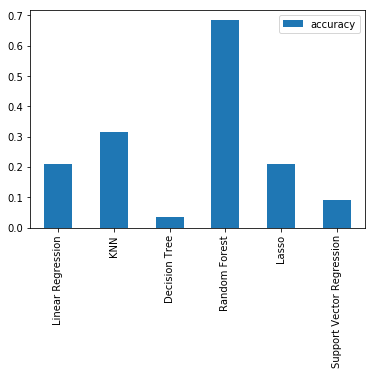

In [64]:
# Compare models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [65]:
# Lets check GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

gbr.fit(X_train,y_train)

y_pred=gbr.predict(X_test)

gbrscore=gbr.score(X_test, y_test)
print(gbrscore*100)

70.89927394076834


#### Here RandomForestRegressor and GradientBoostingRegressor is giving maximum accuracy. We can further tune this model

In [66]:
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(X_train, y_train)
gdrf.best_params_

{'n_estimators': 200}

In [67]:
def get_max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=r_state)
        reg.fit(X_train,y_train)
        pred=reg.predict(X_test)
        r2score=r2_score(y_test, pred)
        if r2score > max_r2score:
            max_r2score   = r2score
            final_r_state = r_state
    print("The maximum r2 score is: ", max_r2score, " and achieved at random state", final_r_state)

In [69]:
rf = RandomForestRegressor(n_estimators=200)
get_max_r2_score(rf,X,y)

The maximum r2 score is:  0.7620292968147048  and achieved at random state 94


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=94)
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
r2score = r2_score(y_test, pred)
cv = cross_val_score(rf, X, y, cv=5, scoring='r2').mean()
print("The accuracy score is", r2score)
print("The cross val score is", cv)

The accuracy score is 0.7645721400435382
The cross val score is 0.7048632406540988


In [71]:
def analyse_model(model):    
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("R2 model score: %.2f " % model.score(X_test,y_test))
    print("Mean squared error: %.2f " % mean_squared_error(y_test,pred))
    print("mean_absolute_error: %.2f " % mean_absolute_error(y_test,pred))
    print("explained_variance_score: %.2f " % explained_variance_score(y_test,pred)) 
    print("cross_val_score: %.2f " % cross_val_score(model, X_train, y_train,cv=5).mean())
    print("R2_Score: %.2f " % r2_score(y_test,pred))
    print(pd.DataFrame({'Price':y_test,'Price Predicted':pred}).head(10))

In [72]:
# Further tune with AdaBoostRegressor
ada_rfregressor=AdaBoostRegressor()
ada_rfregressor=AdaBoostRegressor(base_estimator=rf, learning_rate=0.1)
ada_rfregressor.fit(X_train, y_train)
ada_pred = ada_rfregressor.predict(X_test)
analyse_model(ada_rfregressor)

R2 model score: 0.76 
Mean squared error: 86748.81 
mean_absolute_error: 185.80 
explained_variance_score: 0.76 
cross_val_score: 0.69 
R2_Score: 0.76 
       Price  Price Predicted
4721     700           538.75
4972     200           371.00
9563     700           542.75
1093     600           568.75
12018   1500          1382.00
3875    1200          1563.00
5448     900           793.50
476     1600          1744.00
4961     200           283.00
948      500           568.50


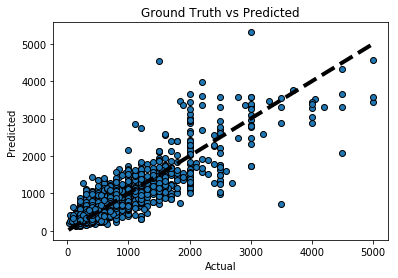

In [73]:
# Lets Visualize the Goodness of the Prediction
fig, ax = plt.subplots()
ax.scatter(y_test, ada_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

#### RandomForestRegressor is giving accuracy score 76 and a cross val score 70. We can finalise this model.

In [75]:
# Predicting the test data
predtest = rf.predict(df_test)
pd.DataFrame(predtest).to_csv("Restaurant_food_predictions.csv")

In [76]:
# Lets Save the model as pickle in a file
import pickle
filename = 'Restaurant_food_predictions.pkl'
pickle.dump(rf, open(filename, 'wb'))